# "Training ML models: Tips & Tricks" workshop at UB, SUNY

I am honored to be invited to present at the CSE workshops at UB. This webpage contains all the resources/material for my talk at UB.

## Quick intro to Machine Learning

My research experience has led me to appreciate the true essence of ML which encompasses mathematical concepts including statistics, probability, calculus, linear algebra, and optimization.

At its core, machine learning employs mathematical functions to model the relationships between inputs and outputs. These functions can range from simple linear equations to complex neural networks. The choice of function and how it is adjusted (or learned) during training depends on the algorithm being used and the specific problem being addressed.

### Diving deep into Machine Learning
Let's make our understanding concrete with a straight forward example.

Let's say you want to predict a dependent variable $y$ that is dependent on a single independent variable $x$. We assume that we don't have access to the mapping function $f(x) \rightarrow y$ and we are required to calculate/approximate the function $f(x)$. While the question might look simple at first, that simplicity is deceiving.

```{admonition} Approximating a function using Machine Learning
We are given a bunch of data points $(x,y)$ and we want to find the function $f$ that represents the mapping between $x$ and $y$ i.e., $f(x) = y$. (We are unaware if this mapping from $x$ to $y$ is linear or non-linear).
```

**How do we start?**

For simplicity, first let's assume that the relation between $x$ and $y$ is linear and then try to possibly extend our approach for non-linear mapping later. If the mapping between $x$ and $y$ is linear, then the equation for $f(x)$ looks like:

```{math}
:label: line-equation
y = mx + b
```

Take a closer look at equation {eq}`line-equation`, **what do we know in this equation and what do we need to approximate/calculate the function $f(x)$**. We know the data points $x$ and $y$ $(x, y)$ and we want to find the **optimal values** of $m$ and $b$ to correctly map a given $x$ to $y$.

Now this becomes an optimization problem, but what exactly are we optimizing? A more sensible question to ask here is that, **How do we know what are the optimal values for $m$ and $b$?** We need a metric that validates a set of values for $m$ and $b$.

Let's generate some synthetic data and visualize the data points to come up with this validation metric for the values of $m$ and $b$.


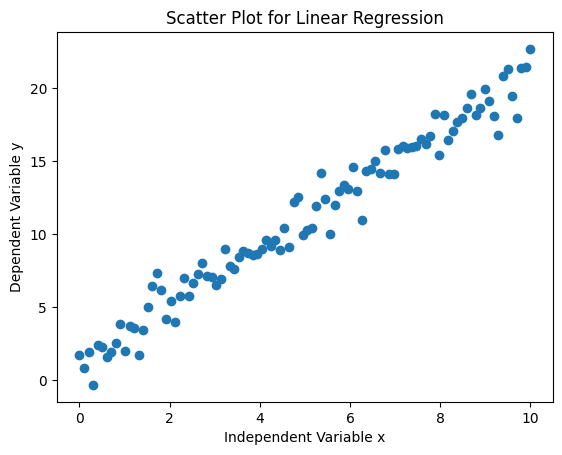

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for linear relation
x = np.linspace(0, 10, 100)  # Independent variable
y = 2*x + 1 + np.random.randn(100)  # Dependent variable with some noise

plt.scatter(x, y)  # Scatter plot of the points
plt.xlabel('Independent Variable x')
plt.ylabel('Dependent Variable y')
plt.title('Scatter Plot for Linear Regression')
plt.show()

The above plot is a good, simple example, we see a clear **linear** between $x$ and $y$ (keep in mind that we have simplified the relation between $x$ and $y$ before and have accordingly generated some synthetic data). We can visually infer that **the best fitting line is the one that passes through all (if not the most points) in the above scatter plot**. Using that notion, let's come up with a metric to validate $m$ and $b$.

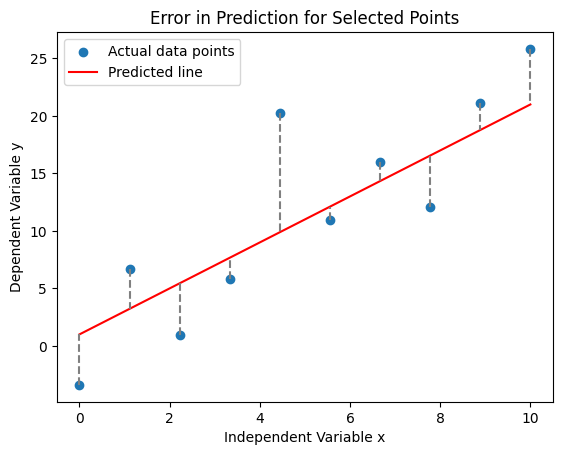

In [13]:
import matplotlib.pyplot as plt
import numpy as np

n_points = 10
# Generating a smaller dataset
x = np.linspace(0, 10, n_points)
y = 2*x + 1 + 5*np.random.randn(n_points)  # Actual data points with noise for fewer points

# Predicted line
y_pred = 2*x + 1 # m = 2 and b = 1

plt.scatter(x, y, label='Actual data points')
plt.plot(x, y_pred, color='red', label='Predicted line')

# Drawing error lines for these points
for xi, yi, ypi in zip(x, y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--')

plt.xlabel('Independent Variable x')
plt.ylabel('Dependent Variable y')
plt.title('Error in Prediction for Selected Points')
plt.legend()
plt.show()

### Defining the error in prediction and why do we need it?

Let's reiterate the need for the error term:
1. We want to find the mapping between $x$ and $y$ using a function $f(x) \rightarrow y$. This function $f(x)$ is now our prediction model that changes with the values of $m$ and $b$ (for the linear case), see {eq}`line-equation`.
2. We want to find the optimal values for $m$ and $b$ and hence find the right mapping $f(x)$.
3. For this we require an error term that tells us how right/wrong our predictions are.

Take a look at the above plot, the dashed lines drawn from the points onto the line represent the error in (linear) model's prediction. We want to incorporate these errors in prediction into the error function, let's call it $E(m, b)$ or $E(\hat{y})$, where $\hat{y}$ is the prediction $\hat{y} = mx+b$

**Naive approach to formulating the error term**

The first approach would be to sum up all the errors in prediction for each data point. The equation for such an error term would look like:

```{math}
:label: wrong-error
E(\hat{y}) = \sum_{i=1}^{N} (\hat{y}-y)
```

```{admonition} Issue with the above error function
:class: danger
However, the major issue with such an error function is the fact that the difference in prediction could be either positive or negative for a given point and if two data points are exactly on either side of the line, then the total error would be $0$ with is definitely wrong.
```

One way to solve this issue is using the modulus operation on the calculated difference. This would make all the errors positive and solve the above issue. The error function becomes:

```{math}
:label: wrong-error-2
E(\hat{y}) = \sum_{i=1}^{N} |(\hat{y}-y)|
```

This error function seems alright. There is no reason for us to discard this function at least right now (spoiler!!!)


### Finding the minimum value of the error function using math optimization

The way we formulated the error term, it's clear that we are interested in finding the minimum value of the function. There are many ways to achieve this:
1. Using the knowledge of high-school calculus, we know that a convex function $C(x)$ is minimum at a point $x_0$ at which its slope (derivative) $C'(x_0)= 0$.
2. A more general-purpose algorithm to **iteratively** find the local/global minima of a function is known as the [Gradient Descent Algorithm](https://www.math.uni-bielefeld.de/documenta/vol-ismp/40_lemarechal-claude.pdf) by Cauchy in **1847**. This algorithm is adapted to train (almost) every traditional Machine Learning model. (The term "Machine Learning" was coined **1959** over a century after the Gradient Descent algorithm was proposed).

### Gradient Descent

Gradient Descent is a **general-purpose** (not specific to machine learning) algorithm to find the global minima for a given convex function (and local minima for any non-convex function). A rudimentary definition of a convex function is a smooth function with single global minima without structural fluctuations.




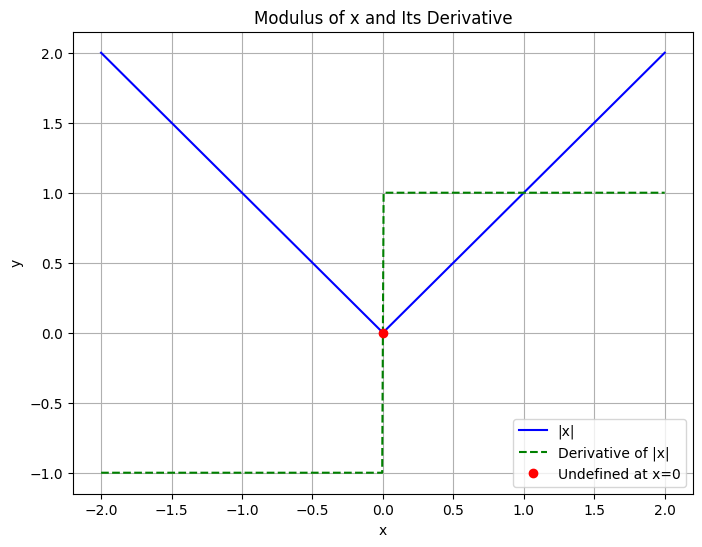

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the range for x including negative values
x = np.linspace(-2, 2, 400)
y = np.abs(x)  # Modulus of x

# Derivative of |x|, which is undefined at x = 0
# Using a piecewise function to represent the derivative
y_derivative = np.piecewise(x, [x < 0, x > 0], [-1, 1])

plt.figure(figsize=(8, 6))

# Plotting modulus of x
plt.plot(x, y, label='|x|', color='blue')

# Plotting derivative of |x|
plt.plot(x, y_derivative, label="Derivative of |x|", color='green', linestyle='--')

# Highlighting the point where the derivative is undefined
plt.plot(0, 0, 'ro', label='Undefined at x=0')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Modulus of x and Its Derivative')
plt.legend()
plt.grid(True)
plt.show()

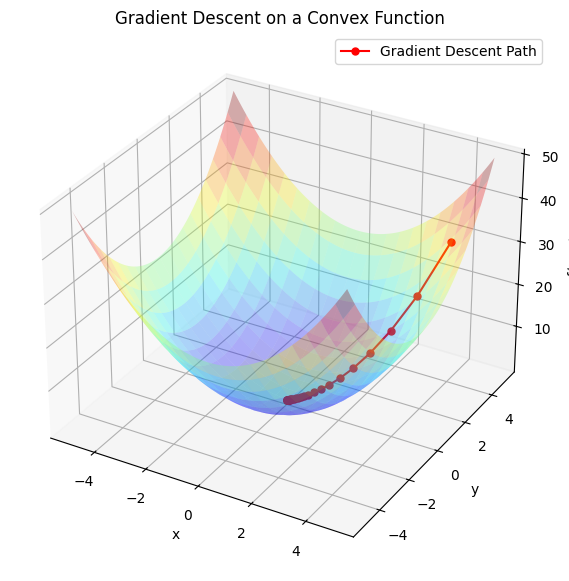

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the convex function
def f(x, y):
    return x**2 + y**2

# Generate x, y grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Gradient descent parameters
alpha = 0.1  # Learning rate
x_start, y_start = 4.0, 4.0  # Starting point

# Gradient descent function to update x, y
def grad(x, y):
    return 2*x, 2*y  # Derivative of f(x, y)

# Perform gradient descent
x_values, y_values, z_values = [x_start], [y_start], [f(x_start, y_start)]
for _ in range(30):
    dx, dy = grad(x_start, y_start)
    x_start, y_start = x_start - alpha * dx, y_start - alpha * dy
    x_values.append(x_start)
    y_values.append(y_start)
    z_values.append(f(x_start, y_start))

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=5, cstride=5, alpha=0.3, cmap='jet')
ax.plot(x_values, y_values, z_values, color='r', marker='o', markersize=5, label='Gradient Descent Path')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent on a Convex Function')
ax.legend()
plt.show()
